In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [74]:
df =pd.read_csv("winequality-red.csv") 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

### Overview of the Dataset

In [75]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


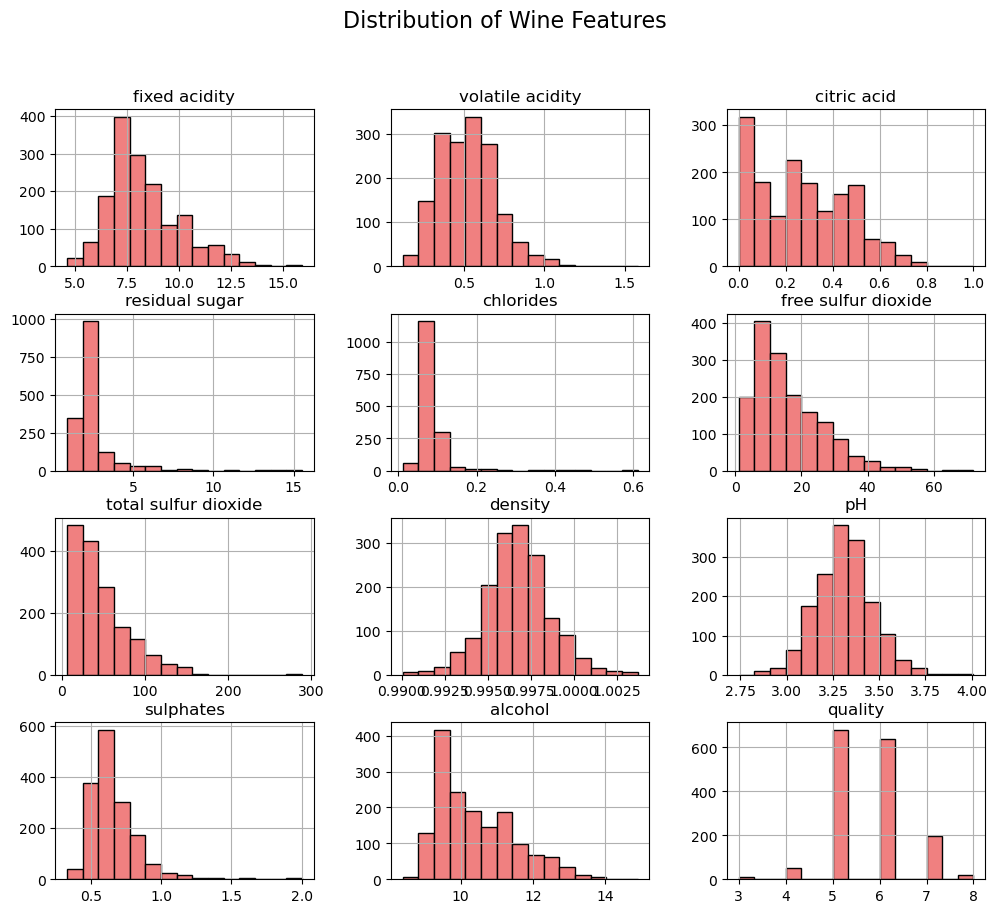

In [77]:
# Plot histograms for all numerical columns
df.hist(bins=15, figsize=(12,10), color='lightcoral', edgecolor='black')
plt.suptitle('Distribution of Wine Features', fontsize=16)
plt.show()

### Boxplots to check outliers

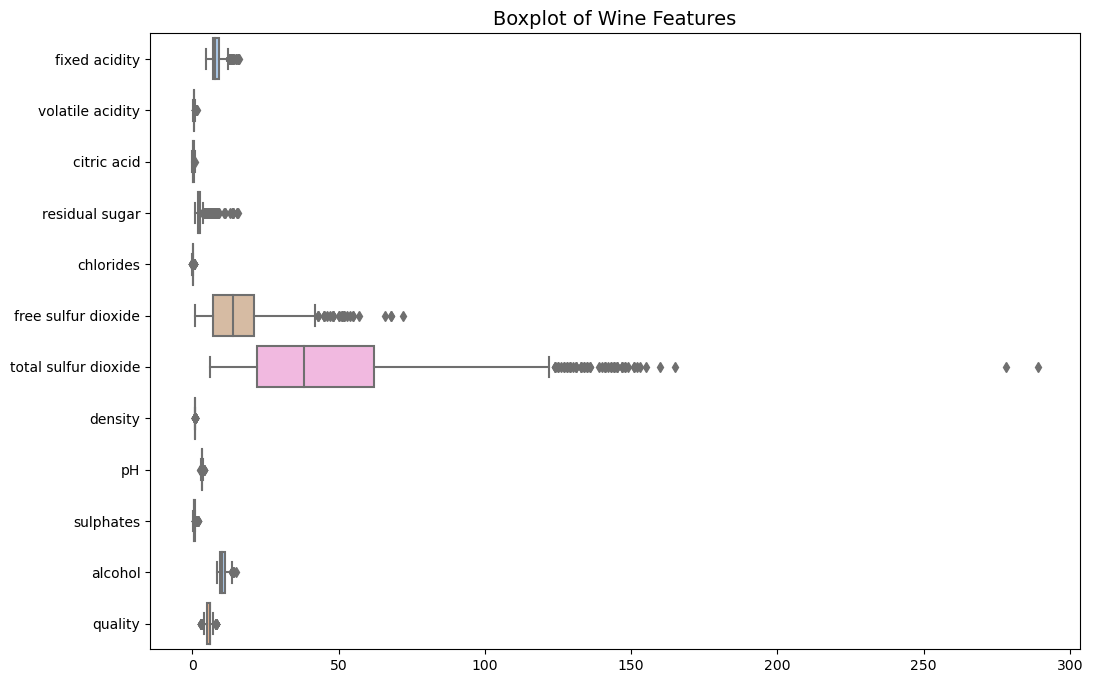

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient='h', palette='pastel')
plt.title('Boxplot of Wine Features', fontsize=14)
plt.show()

In [79]:
# 定义IQR方法检测异常值数量
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers per column:")
print(outliers)

Number of outliers per column:
fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


In [80]:
# Remove outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)
# 26% of the data is flagged as containing outliers.

Before cleaning: (1599, 12)
After cleaning: (1179, 12)


## Correlation with Quality

### Correlation Analysis

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


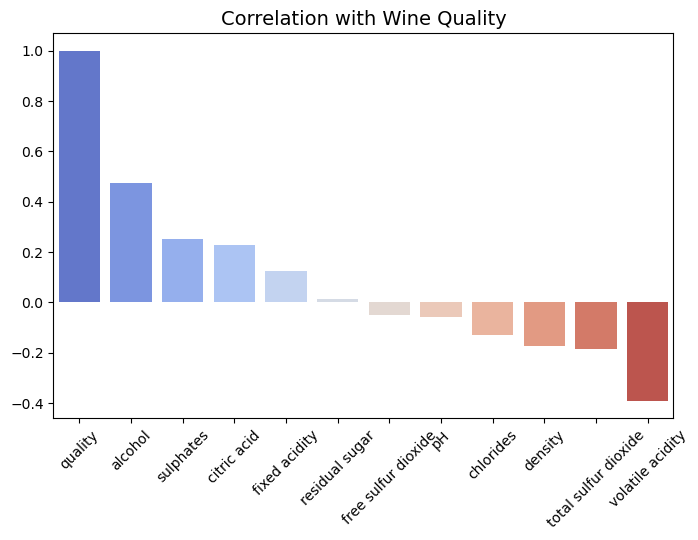

In [81]:
corr_with_quality = df.corr()['quality'].sort_values(ascending=False)
print(corr_with_quality)

# Visualize top correlations
plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_quality.index, y=corr_with_quality.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation with Wine Quality', fontsize=14)
plt.show()

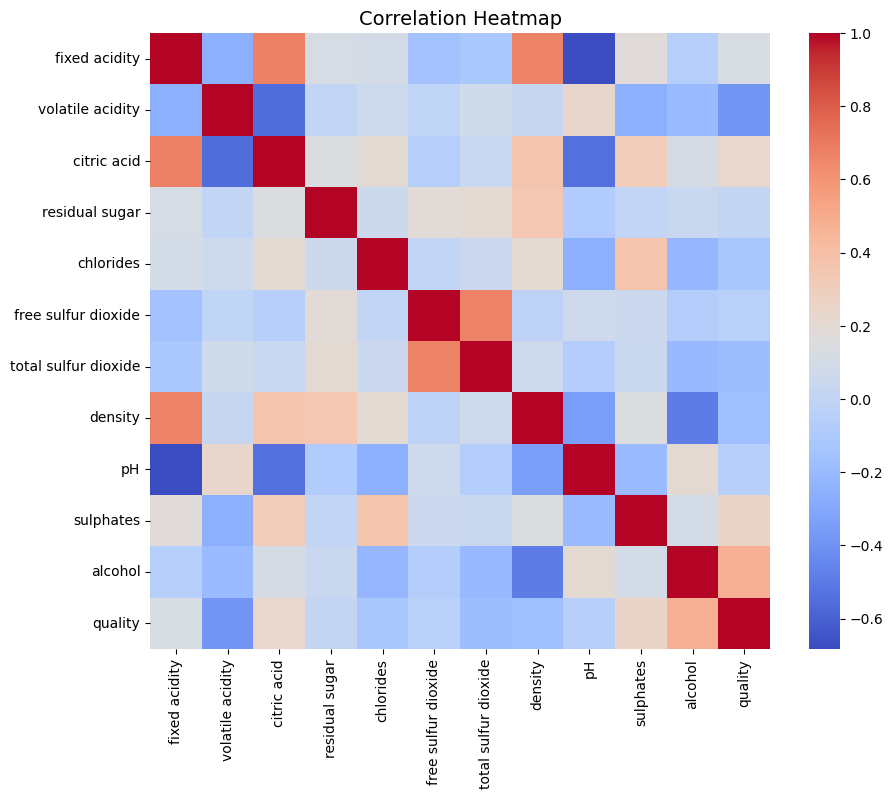

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

### Pairwise Relationships
The scatterplots show pairwise relationships among key variables.
Notice:
- alcohol ↑ → quality ↑  (positive trend)
- volatile acidity ↑ → quality ↓ (negative trend)
- sulphates shows a mild positive trend

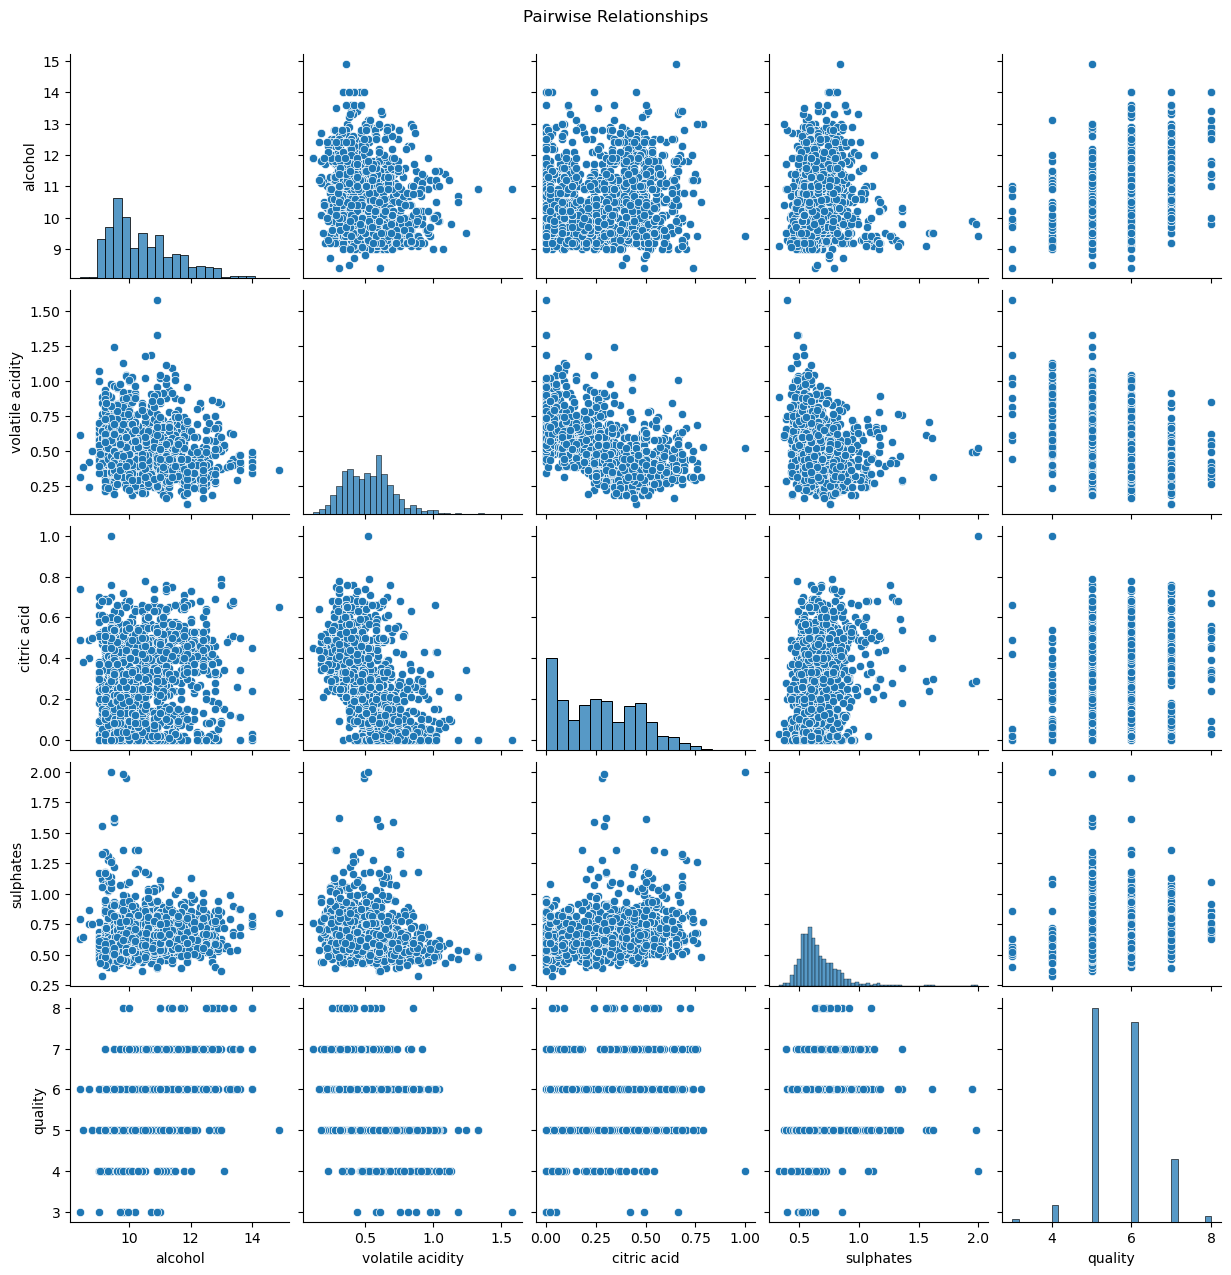

In [83]:
sns.pairplot(df, vars=['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'quality'], diag_kind='hist', palette='husl')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

## Regression: Visual trends & simple OLS

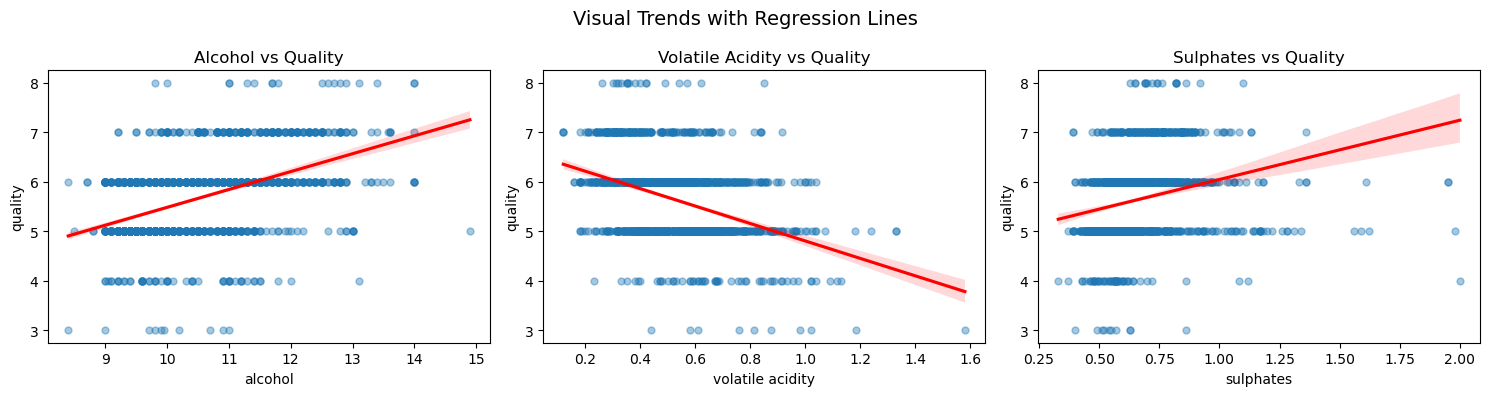

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.regplot(x='alcohol', y='quality', data=df, ax=axes[0],
            scatter_kws={'alpha':0.4, 's':25}, line_kws={'color':'red'})
axes[0].set_title('Alcohol vs Quality')

sns.regplot(x='volatile acidity', y='quality', data=df, ax=axes[1],
            scatter_kws={'alpha':0.4, 's':25}, line_kws={'color':'red'})
axes[1].set_title('Volatile Acidity vs Quality')

sns.regplot(x='sulphates', y='quality', data=df, ax=axes[2],
            scatter_kws={'alpha':0.4, 's':25}, line_kws={'color':'red'})
axes[2].set_title('Sulphates vs Quality')

plt.suptitle('Visual Trends with Regression Lines', fontsize=14)
plt.tight_layout()
plt.show()

## Simple Linear Regression (OLS)
We fit three single-variable models to predict wine quality.
Focus on:
- coef: slope (direction & magnitude)
- P>|t|: significance (<0.05 means significant)
- R-squared: percentage of variance explained
- RMSE: average prediction error

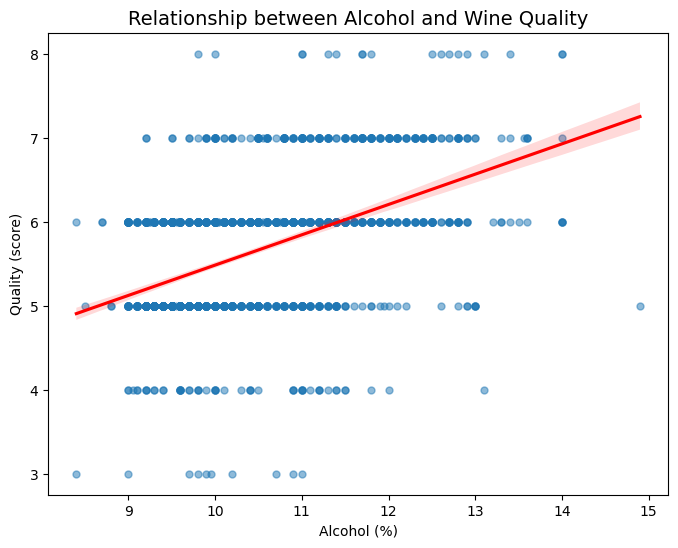

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
R-squared: 0.2267,  Adj. R-squared: 0.2263
RMSE: 0.7099


In [85]:
plt.figure(figsize=(8,6))
sns.regplot(x='alcohol', y='quality', data=df,
            scatter_kws={'alpha':0.5, 's':25}, line_kws={'color':'red'})
plt.title('Relationship between Alcohol and Wine Quality', fontsize=14)
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality (score)')
plt.show()

# 2. Fit simple linear regression model
X = sm.add_constant(df['alcohol'])   # add intercept term
y = df['quality']

model_alcohol = sm.OLS(y, X).fit()

# 3. Print key results
print(model_alcohol.summary().tables[1])   # coefficient table only
print(f"R-squared: {model_alcohol.rsquared:.4f},  Adj. R-squared: {model_alcohol.rsquared_adj:.4f}")

# 4. Calculate RMSE
y_pred = model_alcohol.predict(X)
rmse = np.sqrt(np.mean((y - y_pred)**2))
print(f"RMSE: {rmse:.4f}")

## Multiple Linear Regression, MLR

In [86]:
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density']
X = df[features]
y = df['quality']

In [87]:
import statsmodels.api as sm

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     161.8
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          2.87e-139
Time:                        16:49:13   Log-Likelihood:                -1598.3
No. Observations:                1599   AIC:                             3209.
Df Residuals:                    1593   BIC:                             3241.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.5040     11.964  

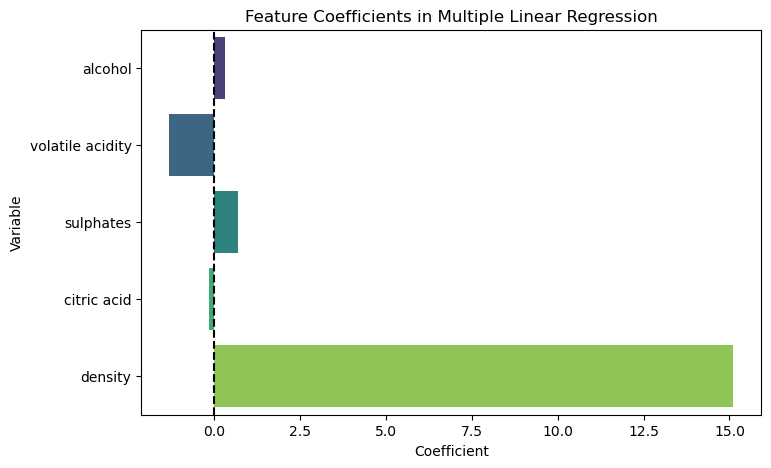

In [88]:
coef_df = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': model.params.values
}).iloc[1:] 

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')
plt.title('Feature Coefficients in Multiple Linear Regression')
plt.axvline(0, color='black', linestyle='--')

### VIF (Variance Inflation Factor)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

           Variable            VIF
0             const  527499.756093
1           alcohol       1.541100
2  volatile acidity       1.596073
3         sulphates       1.141194
4       citric acid       2.007475
5           density       1.866271


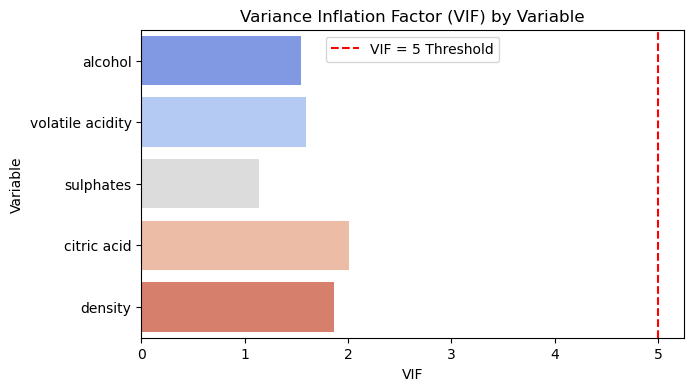

In [90]:
plt.figure(figsize=(7,4))
sns.barplot(x='VIF', y='Variable', data=vif.iloc[1:], palette='coolwarm')
plt.title('Variance Inflation Factor (VIF) by Variable')
plt.axvline(5, color='red', linestyle='--', label='VIF = 5 Threshold')
plt.legend()

### Residual Analysis

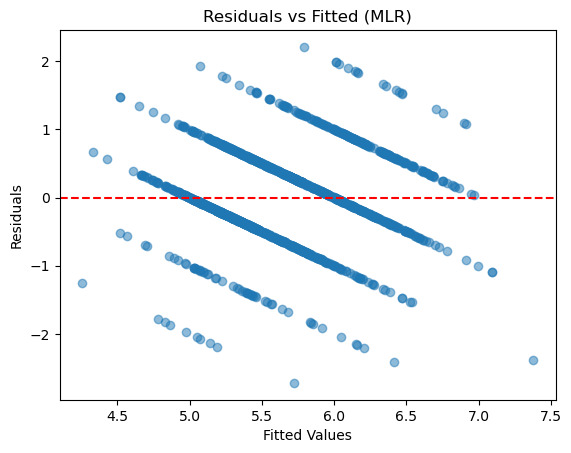

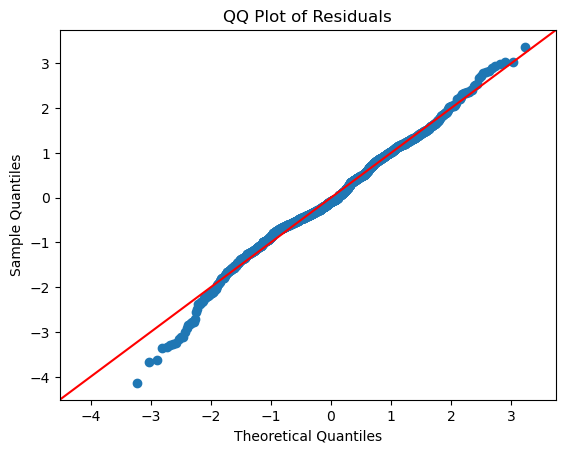

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = model.resid
fitted = model.fittedvalues


plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (MLR)')
plt.show()

# QQ图
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual Wine Quality')

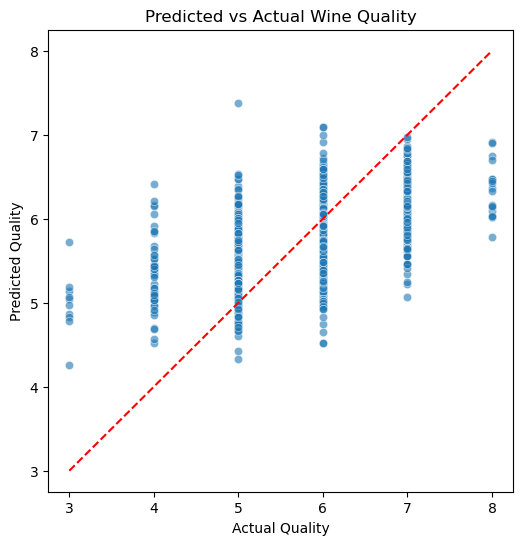

In [92]:
y_pred = model.predict(X)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs Actual Wine Quality')

### Distribution Plot

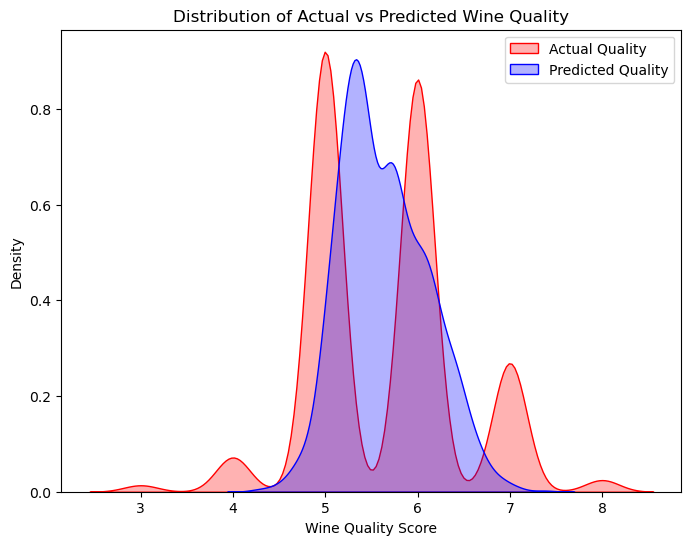

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.kdeplot(y, label='Actual Quality', color='red', fill=True, alpha=0.3)
sns.kdeplot(y_pred, label='Predicted Quality', color='blue', fill=True, alpha=0.3)
plt.title('Distribution of Actual vs Predicted Wine Quality')
plt.xlabel('Wine Quality Score')
plt.ylabel('Density')
plt.legend()
plt.show()